# Introduction 

* In developing nations like Nigeria, high-risk pregnancies pose a significant challenge, especially for women from lower and middle-income backgrounds. These pregnancies, which can threaten the well-being of both mother and unborn child, often require specialized medical care. Some pregnancies develop complications as they progress, while others involve elevated risk factors from the outset.

* Although early and regular prenatal care can substantially improve outcomes, women in rural areas often lack access to proper healthcare and may have limited awareness about potential pregnancy complications. Moreover, the fear of being subjected to unnecessary and expensive medical tests by doctors exacerbates these problems, leading many women to avoid seeking crucial care.

**Objective**
* The project aims to develop a machine learning classification model and a web application to predict the risk level of pregnancy complications in patients. The model will classify patients into low, medium, or high-risk categories based on various factors that impact their health during pregnancy. 

* This will be accomplished by training and developing a machine learning model using a dataset of historical patient records with relevant features. 

* By utilizing this predictive model, patients can be informed about their pregnancy risk level, empowering those with medium or high-risk pregnancies to proactively seek appropriate interventions and medical care. 

**Dataset Overview** 

* **Patient ID** 
* **Name** 
* **Age**: Age in years when a woman is pregnant
* **Body Temperature**: Measure of heat in the body
* **HeartRate**: A normal resting heart rate in beats per minute.
* **Systolic Blood Pressure**: Upper value of Blood Pressure in mmHg, a significant attribute during pregnancy.
* **Diastolic Blood Pressure**: Lower value of Blood Pressure in mmHg, another significant attribute during pregnancy.
* **BMI(kg/m 2)**: General indicator to categorize a person's weight status and potential health risks 
* **Blood Glucose( HbA1c)**: Glycated hemoglobin which shows average blood sugar levels
* **Blood Glucose(Fasting hour-mg/dl)**: Measures blood sugar levels after an 8-hour fast
* **Outcome**: Predicted risk intensity Level during pregnancy 

Monitoring the indicators above helps healthcare providers ensure the health of both mother and baby throughout pregnancy, allowing for timely interventions if needed.

Dataset: Open-source data obtained from Kaggle, https://www.kaggle.com/datasets/mmhossain/pregnancy-risk-factor-data

# Import Necessary Libraries 

In [3]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt  
%matplotlib inline
import pickle
import joblib 

# For data preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# Split train and test data 
from sklearn.model_selection import train_test_split 

# Models 
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC

# Metrics 
from sklearn.metrics import accuracy_score


import warnings
warnings.filterwarnings("ignore")


# Load the dataset

In [4]:
df = pd.read_csv("pregnancy_risk_prediction.csv", encoding='latin1')

In [5]:
# Check the first 5 dataset observations 
df.head()

,Patient ID,Name,Age,Body Temperature(F),Heart rate(bpm),Systolic Blood Pressure(mm Hg),Diastolic Blood Pressure(mm Hg),BMI(kg/m 2),Blood Glucose(HbA1c),Blood Glucose(Fasting hour-mg/dl),Outcome
0,1994601,Moulya,20,97.5,91,161,100,24.9,41,5.8,high risk
1,2001562,Soni,45,97.7,99,99,94,22.1,36,5.7,high risk
2,2002530,Baishali,29,98.6,84,129,87,19.0,42,6.4,mid risk
3,2002114,Abhilasha,26,99.5,135,161,101,23.7,46,4.5,high risk
4,2002058,Aanaya,38,102.5,51,106,91,18.8,38,4.3,high risk


In [6]:
# Check any 6 random observations
df.sample(6)

,Patient ID,Name,Age,Body Temperature(F),Heart rate(bpm),Systolic Blood Pressure(mm Hg),Diastolic Blood Pressure(mm Hg),BMI(kg/m 2),Blood Glucose(HbA1c),Blood Glucose(Fasting hour-mg/dl),Outcome
3580,2013115,Magha,34,101.3,105,117,93,19.9,39,5.4,mid risk
1776,1994726,Nithula,31,96.4,115,123,87,21.3,48,6.9,high risk
4516,2011531,Razwa,20,98.8,86,141,83,18.9,31,5.6,mid risk
552,2011053,Rugu,25,98.6,84,120,85,19.9,30,5.6,low risk
1865,2002462,Shejali,29,98.6,71,118,75,19.9,42,6.1,mid risk
4008,1994423,Prushti,20,98.4,115,113,85,22.1,35,4.4,mid risk


In [7]:
# Check dataset rows and columns 
df.shape

(6103, 11)

* The dataset has 6013 observations and 11 columns.
* **Note** The target variable is 'Outcome' column

In [8]:
# Check dataset info and datatypes 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6103 entries, 0 to 6102
Data columns (total 11 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Patient ID                         6103 non-null   int64  
 1   Name                               6103 non-null   object 
 2   Age                                6103 non-null   int64  
 3   Body Temperature(F)                6103 non-null   float64
 4   Heart rate(bpm)                    6103 non-null   int64  
 5   Systolic Blood Pressure(mm Hg)     6103 non-null   int64  
 6   Diastolic Blood Pressure(mm Hg)    6103 non-null   int64  
 7   BMI(kg/m 2)                        6103 non-null   float64
 8   Blood Glucose(HbA1c)               6103 non-null   int64  
 9   Blood Glucose(Fasting hour-mg/dl)  6103 non-null   float64
 10  Outcome                            6103 non-null   object 
dtypes: float64(3), int64(6), object(2)
memory usage: 524.6+ 

In [9]:
# Check missing values 
df.isnull().sum()

Patient ID                           0
Name                                 0
Age                                  0
Body Temperature(F)                  0
Heart rate(bpm)                      0
Systolic Blood Pressure(mm Hg)       0
Diastolic Blood Pressure(mm Hg)      0
BMI(kg/m 2)                          0
Blood Glucose(HbA1c)                 0
Blood Glucose(Fasting hour-mg/dl)    0
Outcome                              0
dtype: int64

#### As seen above, the dataset has no missing values 

In [10]:
# Summary statistics of the data 
df.describe()

,Patient ID,Age,Body Temperature(F),Heart rate(bpm),Systolic Blood Pressure(mm Hg),Diastolic Blood Pressure(mm Hg),BMI(kg/m 2),Blood Glucose(HbA1c),Blood Glucose(Fasting hour-mg/dl)
count,6.103000e+03,6103.000000,6103.000000,6103.000000,6103.000000,6103.000000,6103.000000,6103.000000,6103.000000
mean,2.003343e+06,26.425037,98.665574,86.100770,129.218253,87.257578,21.435581,37.904473,5.504752
std,6.604395e+03,6.390205,1.590983,22.627587,17.234217,7.793099,2.157060,4.400272,0.905327
min,1.993365e+06,15.000000,39.600000,45.000000,90.000000,9.000000,14.900000,30.000000,3.500000
25%,1.994890e+06,22.000000,98.600000,72.000000,120.000000,82.000000,19.600000,34.000000,4.800000
50%,2.003000e+06,25.000000,98.600000,80.000000,128.000000,87.000000,21.300000,38.000000,5.700000
75%,2.010128e+06,30.000000,98.800000,91.000000,141.000000,92.000000,23.100000,41.000000,6.000000
max,2.013179e+06,250.000000,104.000000,150.000000,169.000000,142.000000,27.900000,50.000000,8.900000


# Data preprocessing 

### Drop irrelevant columns

In [11]:
# drop irrelevant columns 
df.drop(columns = ['Patient ID', 'Name'], inplace = True)

* We dropped 'patient ID' and 'Name' columns above as they don't have any impact in helping us predict the model outcome 

In [12]:
df.head()

,Age,Body Temperature(F),Heart rate(bpm),Systolic Blood Pressure(mm Hg),Diastolic Blood Pressure(mm Hg),BMI(kg/m 2),Blood Glucose(HbA1c),Blood Glucose(Fasting hour-mg/dl),Outcome
0,20,97.5,91,161,100,24.9,41,5.8,high risk
1,45,97.7,99,99,94,22.1,36,5.7,high risk
2,29,98.6,84,129,87,19.0,42,6.4,mid risk
3,26,99.5,135,161,101,23.7,46,4.5,high risk
4,38,102.5,51,106,91,18.8,38,4.3,high risk


### Encoding

In [13]:
# Encode the target column from categorical to numerical 
encoder = LabelEncoder()

encoded_target = encoder.fit_transform(df['Outcome'])
encoded_target

array([0, 0, 2, ..., 0, 0, 1])

In [14]:
df['Outcome'] = encoded_target

In [15]:
df.sample(3)

,Age,Body Temperature(F),Heart rate(bpm),Systolic Blood Pressure(mm Hg),Diastolic Blood Pressure(mm Hg),BMI(kg/m 2),Blood Glucose(HbA1c),Blood Glucose(Fasting hour-mg/dl),Outcome
3493,20,98.6,70,120,80,18.8,30,5.8,1
240,22,98.6,83,124,83,22.0,37,3.7,1
3313,16,96.8,109,105,69,21.1,47,4.1,0


In [16]:
# Retrieve the encoding class mapping
class_mapping = {0:'high risk', 1:'mid risk', 2:'low risk'}
class_mapping 

{0: 'high risk', 1: 'mid risk', 2: 'low risk'}

# Data Visualization 

#### Understand dataset distributions

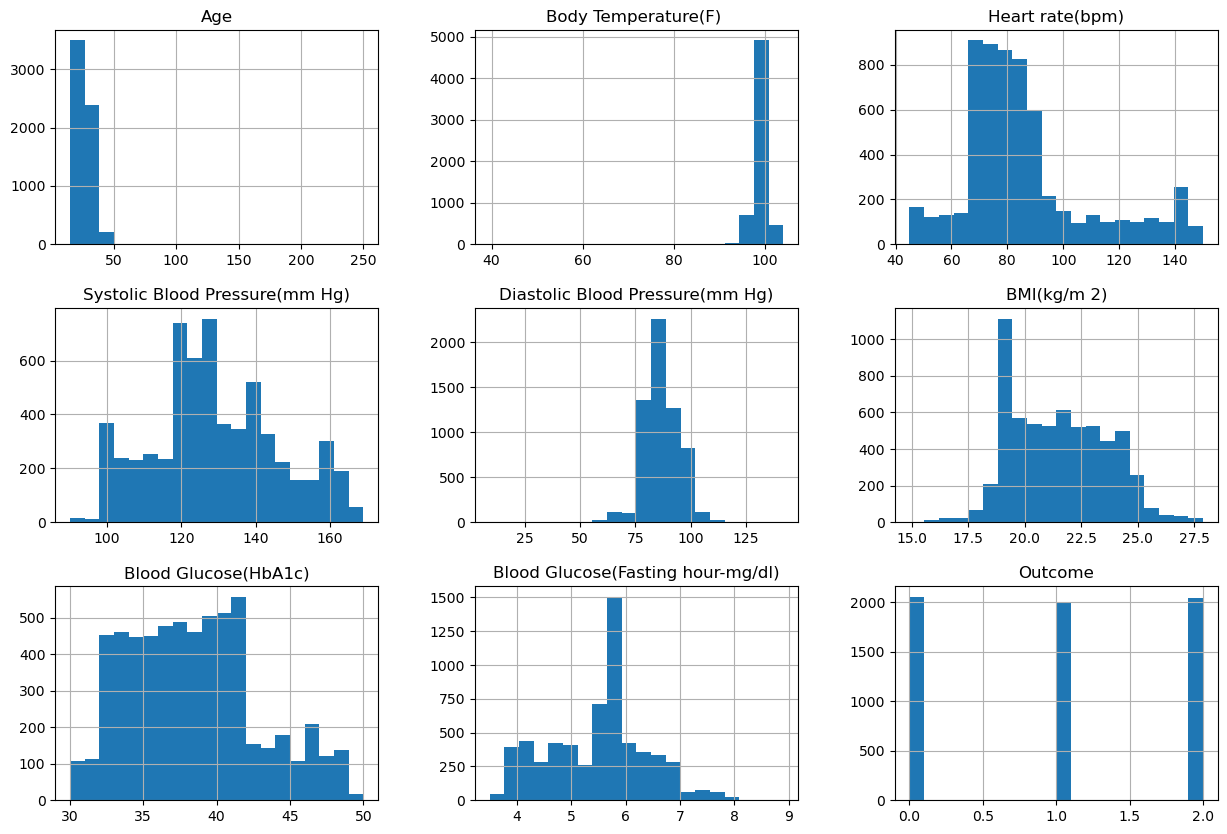

In [17]:
# Plot histograms
df.hist(bins=20, figsize=(15, 10))
plt.show()

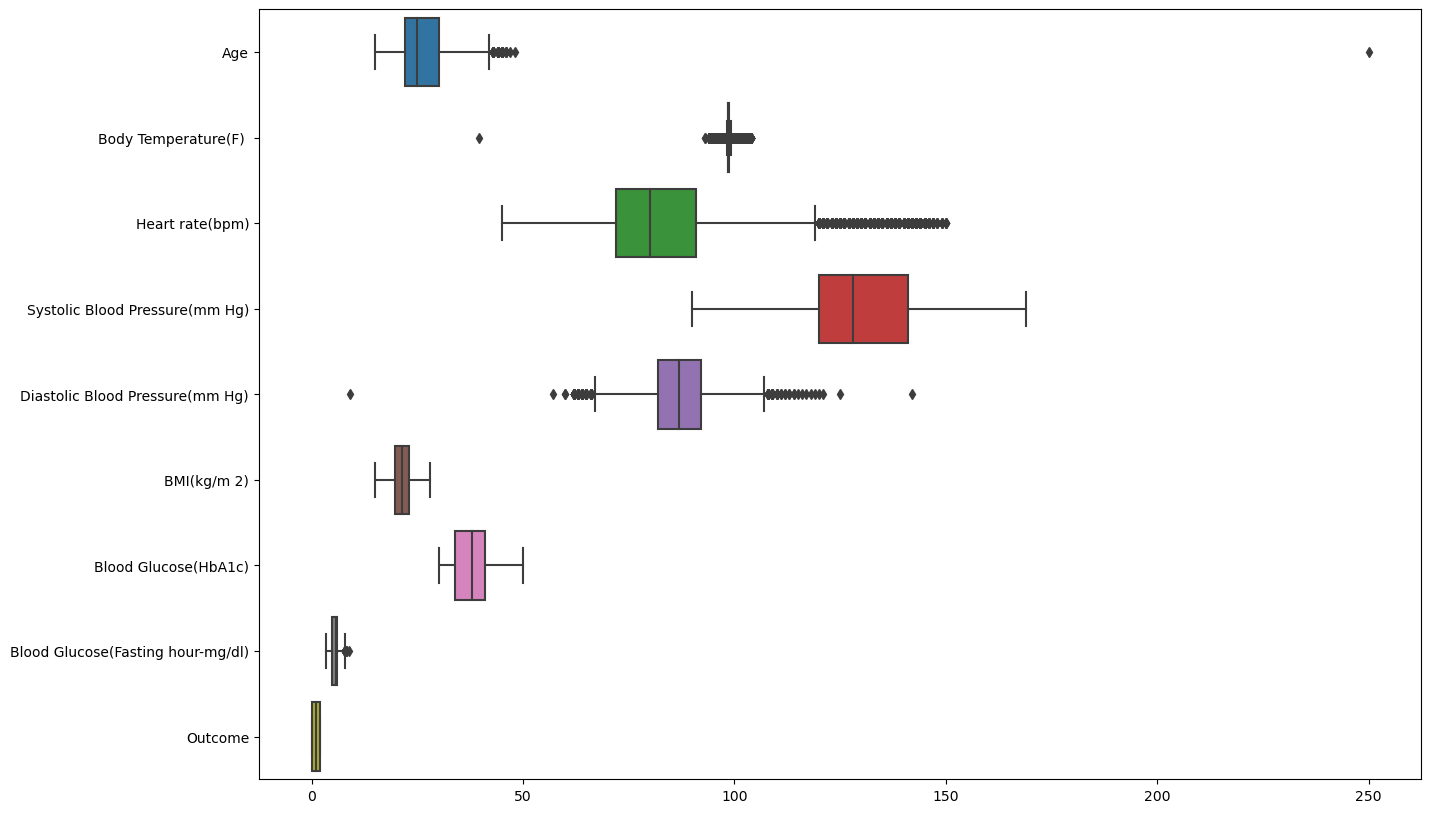

In [18]:
# Box plots ~ Create a figure with multiple box plots
plt.figure(figsize=(15, 10))
sns.boxplot(data=df, orient="h")
plt.show()

# Check Class Imbalance 

* Class imbalance refers to a situation where the number of instances in each class is not evenly distributed. By being aware of class imbalance and addressing it appropriately, we aim to build a robust model that performs well leading to reliable model performance results. 

**Class target mapping of pregnancy risk levels**
* High risk: 0
* Mid risk: 1
* Low risk: 2 

In [19]:
df['Outcome'].value_counts()

0    2059
2    2043
1    2001
Name: Outcome, dtype: int64

In [20]:
imbalance_ratio = df['Outcome'].value_counts(normalize=True) * 100
imbalance_ratio

0    33.737506
2    33.475340
1    32.787154
Name: Outcome, dtype: float64

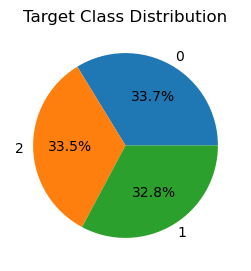

In [21]:
# Plot class distribution pie chart
plt.figure(figsize=(5,3))
plt.pie(imbalance_ratio, labels=imbalance_ratio.index, autopct='%1.1f%%')
plt.title('Target Class Distribution')
plt.show()

### Analysis of Class Imbalance

* **High risk**: Approximately 33.7% of the observations are labeled as "high risk"
* **Mid risk**: Approximately 32.8% of the observations are labeled as "mid risk"
* **Low risk**: Approximately 33.5% of the observations are labeled as "low risk"

From the percentages, the dataset is fairly balanced across the three target classes. So, there is no class imbalance in the dataset, which means that each class or category within our target variable (or outcome variable) is represented in roughly equal proportions

# Feature Extraction 

In [22]:
# Extract train and test data 
target = 'Outcome'

y = df['Outcome'] 

# features 
X = df.drop(columns= target)

 # Train-Test Split 

It involves dividing the available dataset into two separate sets:

* **Train set**: to train the model
* **Test set**: to evaluate the model's performance.

By training the model on one subset (the training set) and testing on another (the testing set), we can get a more accurate measure of the model performance.

In [23]:
# Dividing data on 70/30 % proportion  
X_train, X_test,  y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle = True, random_state = 42 )

In [24]:
# Dipslay train and test proportions
print(X.shape, X_train.shape, X_test.shape)

(6103, 8) (4882, 8) (1221, 8)


In [25]:
df.head()

,Age,Body Temperature(F),Heart rate(bpm),Systolic Blood Pressure(mm Hg),Diastolic Blood Pressure(mm Hg),BMI(kg/m 2),Blood Glucose(HbA1c),Blood Glucose(Fasting hour-mg/dl),Outcome
0,20,97.5,91,161,100,24.9,41,5.8,0
1,45,97.7,99,99,94,22.1,36,5.7,0
2,29,98.6,84,129,87,19.0,42,6.4,2
3,26,99.5,135,161,101,23.7,46,4.5,0
4,38,102.5,51,106,91,18.8,38,4.3,0


# Train Logistic Regression Model 

Logistic regression is a popular machine learning algorithm used for binary classification. However, it can be extended to handle multi-class classification problems through techniques such as One-vs-Rest (OvR) and Softmax (Multinomial) regression. 

In [26]:
# Create an instance of logistic model 
log_model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=200)

#Train model 
log_model.fit(X_train, y_train)

LogisticRegression(max_iter=200, multi_class='multinomial')

In [27]:
log_model.predict(X_test)

array([1, 1, 0, ..., 1, 0, 2])

In [28]:
# Model evaluation 
X_train_pred = log_model.predict(X_train)
Train_acc = accuracy_score(X_train_pred, y_train).round(2)

print('Train accuracy score:', Train_acc)

#Test Data prediction
X_test_pred = log_model.predict(X_test) 
Test_acc = accuracy_score(X_test_pred, y_test).round(2)

print('Test accuracy score:', Test_acc)

Train accuracy score: 0.55
Test accuracy score: 0.54


# Train Decision Tree Model  

A decision tree is a supervised learning model used for both classification and regression tasks. It splits the data into subsets based on the value of input features, creating a tree-like model of decisions. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features.

In [29]:
# Create an instance of logistic model 
dt_model = DecisionTreeClassifier(random_state = 32)

#Train model 
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=32)

In [30]:
dt_model.predict(X_test)

array([1, 0, 0, ..., 1, 2, 1])

In [31]:
# Model evaluation 
X_train_pred = dt_model.predict(X_train)
Train_acc = accuracy_score(X_train_pred, y_train).round(2)

print('Train accuracy score:', Train_acc)

#Test Data prediction
X_test_pred = dt_model.predict(X_test) 
Test_acc = accuracy_score(X_test_pred, y_test).round(2)

print('Test accuracy score:', Test_acc)

Train accuracy score: 1.0
Test accuracy score: 0.98


# Train Random Forest Model 

Random Forest model is an ensemble learning method primarily used for classification and regression tasks. It builds multiple decision trees and merges them together to get a more accurate and stable prediction.

In [32]:
rf_model = RandomForestClassifier(n_estimators=100, random_state = 30)

#Train model 
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=30)

In [33]:
#prediction 
rf_model.predict(X_test)

array([1, 0, 0, ..., 1, 2, 1])

In [34]:
# Model evaluation 
X_train_pred = rf_model.predict(X_train)
Train_acc = accuracy_score(X_train_pred, y_train).round(2)

print('Train accuracy score:', Train_acc)

#Test Data prediction
X_test_pred = rf_model.predict(X_test) 
Test_acc = accuracy_score(X_test_pred, y_test).round(2)

print('Test accuracy score:', Test_acc)

Train accuracy score: 1.0
Test accuracy score: 0.99


# Train AdaBoost Model 

Adaboost, short for Adaptive Boosting, is a powerful ensemble machine learning technique, particularly effective for classification problems and less prone to overfitting. 

In [35]:
# Create an instance of logistic model 
ab_model = AdaBoostClassifier(n_estimators=50,random_state = 32)

#Train model 
ab_model.fit(X_train, y_train)

AdaBoostClassifier(random_state=32)

In [36]:
#prediction 
ab_model.predict(X_test)

array([1, 0, 0, ..., 1, 2, 1])

In [37]:
# Model evaluation 
X_train_pred = ab_model.predict(X_train)
Train_acc = accuracy_score(X_train_pred, y_train).round(2)

print('Train accuracy score:', Train_acc)

#Test Data prediction
X_test_pred = ab_model.predict(X_test) 
Test_acc = accuracy_score(X_test_pred, y_test).round(2)

print('Test accuracy score:', Test_acc)

Train accuracy score: 0.94
Test accuracy score: 0.95


# Train Support Vector Machine Model 

In [38]:
# Initialize the SVM object 
svm_model = SVC(kernel='linear', random_state=32)

* SVM is sensitive to the scale of the data, so it's important to standardize the features.

In [39]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [40]:
#Train the model 
svm_model.fit(X_train_scaled, y_train)

SVC(kernel='linear', random_state=32)

In [41]:
# make predictions 
svm_model.predict(X_test_scaled)

array([1, 1, 0, ..., 1, 2, 2])

In [42]:
# Model evaluation 
X_train_pred = svm_model.predict(X_train_scaled)
Train_acc = accuracy_score(X_train_pred, y_train).round(2)

print('Train accuracy score:', Train_acc)

#Test Data prediction
X_test_pred = svm_model.predict(X_test_scaled) 
Test_acc = accuracy_score(X_test_pred, y_test).round(2)

print('Test accuracy score:', Test_acc)

Train accuracy score: 0.6
Test accuracy score: 0.59


# Making a Prediction System 

In [43]:
input_data = (38,101.1,141,144,84,24.8,32,5.8) 

# Convert the input data into a numpy array
input_data_as_numpy = np.asarray(input_data)

# Reshape the array since we are predicting for one instance
input_data_reshape = input_data_as_numpy.reshape(1,-1)

# Making prediction and printing the appropriate message
prediction = ab_model.predict(input_data_reshape)
print(prediction)
             
if prediction[0] == 0:
    print('You have a high risk pregnancy. Please seek urgent medical attention!')
elif prediction[0] == 1:
    print('You have a medium risk pregnancy. We highly recommend that you to seek medical attention.')
elif prediction[0] == 2:
    print('You have low risk pregnancy.However, remember to attend all your scheduled prenatal appointments.')
else:
    print('Error: please enter your health data again')
    

[0]
You have a high risk pregnancy. Please seek urgent medical attention!


# Save the Model

In [44]:
filename = 'trained_model.sav'
pickle.dump(ab_model, open(filename, 'wb'))

In [45]:
loaded_model = pickle.load(open('trained_model.sav', 'rb'))

In [46]:
input_data = (28,98.6,79,136,87,23.7,34,4.4)

# Convert the input data into a numpy array
input_data_as_numpy = np.asarray(input_data)

# Reshape the array since we are predicting for one instance
input_data_reshape = input_data_as_numpy.reshape(1,-1)

# Making prediction
prediction = loaded_model.predict(input_data_reshape)
print (prediction)

if prediction[0] == 0:
    print('You have a high risk pregnancy. Please seek urgent medical attention!')
elif prediction[0] == 1:
    print('You have a medium risk pregnancy. We highly recommend that you to seek medical attention.') 
elif prediction[0] == 2:
    print('You have low risk pregnancy, However, remember to attend all your scheduled prenatal appointments') 
else:
    print('Error: Please enter your health data again')

[1]
You have a medium risk pregnancy. We highly recommend that you to seek medical attention.


In [45]:
for column in X.columns:
    print(column)

Age
Body Temperature(F) 
Heart rate(bpm)
Systolic Blood Pressure(mm Hg)
Diastolic Blood Pressure(mm Hg)
BMI(kg/m 2)
Blood Glucose(HbA1c)
Blood Glucose(Fasting hour-mg/dl)
